<a href="https://colab.research.google.com/github/CarmemMarinho/poscienciasdedados/blob/main/MVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Análise de Dados e Boas Práticas
Aluna: Carmem Maria Marinho de Souza Vasconcelos

## 1. Definição do Problema

O dataset utilizado neste projeto foi o Shop Customer Data, obtido no Kaggle (www.kaggle.com), que apresenta informações do perfil de clientes e a pontuação de gastos em uma loja. É um banco de dados gerado manualmente e foi coletado por meio de uma pesquisa realizada durante 1 ano sobre clientes. 

O objetivo deste dataset é atribuir aos clientes uma pontuação de gastos, que pode representar o potencial de compra, possibilitando o proprietário de uma empresa entender melhor as características dos seus cliente e auxiliá-lo na elaboração de estratégias de aumento das vendas com base na personalização do atendimento.  

Inicialmente, vamos trabalhar na análise dos dados do dataset, em seguida faremos a visualização dos dados gerando alguns insights. Depois, passaremos para a etapa de tratamento e limpeza dos dados e, finalmente, a separação em grupos de teste e treino. Trata-se de um problema de aprendizado supervisionado.

Para mais detalhes sobre este dataset, consulte: https://www.kaggle.com/datasets/datascientistanna/customers-dataset

**Informações sobre os atibutos:**

1. **CustomerID** - Identificação do cliente

2. **Gender** - Gênero

3. **Age** - Idade

4. **Annual Income ($)** - Renda anual, em Dólar

5. **Spending Score** - Pontuação atribuída pela loja, com base no comportamento do cliente e na natureza do gasto

6. **Profession** - Profissão do cliente

7. **Work Experience** - Experiência de trabalho, em anos

8. **Family Size** - Quantidade de membros da família do cliente

Primeiro, vamos fazer a importação das bibliotecas utilizadas neste projeto.

In [ ]:
# Importação de Pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
# Configuração para não exibir warnings
import warnings
warnings.filterwarnings("ignore")

## 2. Carga de Dados

Iremos usar o pacote Pandas (Python Data Analysis Library) para carregar um arquivo .csv disponível online e visualizar as 5 primeiras linhas do dataset importado.

In [ ]:
# Importando dados de uma url para um dataframe

# Informa a url de importação do dataset
url = 'https://raw.githubusercontent.com/CarmemMarinho/poscienciasdedados/main/Customers.csv'

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

In [ ]:
# Mostra as 5 primeras linhas do dataset
dataset.head()

CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6

Para melhorar a visualização e leitura do dataset, vamos renomear as colunas do dataset, simplificando o texto.

In [ ]:
# Informa os novos nomes que terão as colunas
colunas = ['ID', 'Gender', 'Age', 'Income', 'Score', 'Profession', 'Experience', 'Family']

# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url, names=colunas, skiprows=1, delimiter=',')

# Mostra as 5 primeras linhas do dataset com as colunas renomeadas
dataset.head()

ID  Gender  Age  Income  Score     Profession  Experience  Family
0   1    Male   19   15000     39     Healthcare           1       4
1   2    Male   21   35000     81       Engineer           3       3
2   3  Female   20   86000      6       Engineer           1       1
3   4  Female   23   59000     77         Lawyer           0       2
4   5  Female   31   38000     40  Entertainment           2       6

Para ajudar no entendimento dos dados, vamos criar uma nova coluna *Class*, para categorizar o intervalo de valores presentes na coluna '
*Score*, em Baixo, Médio e Alto.

In [ ]:
# Cria nova coluna no dataset
classes = pd.qcut(dataset.Score, q=3, labels=['Baixo', 'Médio', 'Alto'])
dataset['Class'] = classes

# Mostra as 5 primeras linhas do dataset com a nova coluna criada
dataset.head()

ID  Gender  Age  Income  Score     Profession  Experience  Family  Class
0   1    Male   19   15000     39     Healthcare           1       4  Médio
1   2    Male   21   35000     81       Engineer           3       3   Alto
2   3  Female   20   86000      6       Engineer           1       1  Baixo
3   4  Female   23   59000     77         Lawyer           0       2   Alto
4   5  Female   31   38000     40  Entertainment           2       6  Médio

## 3. Análise de Dados

### 3.1 Estatísticas Descritivas
Agora, utilizaremos alguns comandos da biblioteca Pandas para exibir algumas estatísticas descritivas e fazer uma rápida análise exploratória do dataset, examinando suas dimensões, informações e alguns exemplos de linhas.

Como podemos ver, o dataset contém 2000 instâncias (linhas) e, com a nova coluna *Class*, 9 colunas.

In [ ]:
# Mostra as dimensões do dataset
print(dataset.shape)

(2000, 9)


In [ ]:
# Mostra as informações do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          2000 non-null   int64   
 1   Gender      2000 non-null   object  
 2   Age         2000 non-null   int64   
 3   Income      2000 non-null   int64   
 4   Score       2000 non-null   int64   
 5   Profession  1965 non-null   object  
 6   Experience  2000 non-null   int64   
 7   Family      2000 non-null   int64   
 8   Class       2000 non-null   category
dtypes: category(1), int64(6), object(2)
memory usage: 127.2+ KB
None


In [ ]:
# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

ID  Gender  Age  Income  Score     Profession  Experience  Family  Class
0   1    Male   19   15000     39     Healthcare           1       4  Médio
1   2    Male   21   35000     81       Engineer           3       3   Alto
2   3  Female   20   86000      6       Engineer           1       1  Baixo
3   4  Female   23   59000     77         Lawyer           0       2   Alto
4   5  Female   31   38000     40  Entertainment           2       6  Médio
5   6  Female   22   58000     76         Artist           0       2   Alto
6   7  Female   35   31000      6     Healthcare           1       3  Baixo
7   8  Female   23   84000     94     Healthcare           1       3   Alto
8   9    Male   64   97000      3       Engineer           0       3  Baixo
9  10  Female   30   98000     72         Artist           1       4   Alto

In [ ]:
# Mostra as 10 últimas linhas do dataset
dataset.tail(10)

ID  Gender  Age  Income  Score     Profession  Experience  Family  \
1990  1991  Female   30  166983     69         Artist           7       3   
1991  1992  Female   97  129444     96  Entertainment           5       6   
1992  1993    Male   94  181183     24      Marketing           9       3   
1993  1994  Female   64  175254    100         Artist           9       5   
1994  1995  Female   19   54121     89       Engineer           6       3   
1995  1996  Female   71  184387     40         Artist           8       7   
1996  1997  Female   91   73158     32         Doctor           7       7   
1997  1998    Male   87   90961     14     Healthcare           9       2   
1998  1999    Male   77  182109      4      Executive           7       2   
1999  2000    Male   90  110610     52  Entertainment           5       2   

      Class  
1990   Alto  
1991   Alto  
1992  Baixo  
1993   Alto  
1994   Alto  
1995  Médio  
1996  Baixo  
1997  Baixo  
1998  Baixo  
1999  Médio

É sempre importante verificar os tipos dos atributos do dataset, pois pode ser necessário realizar conversões. Já fizemos anteriormente com o comando info, mas vamos ver uma outra forma de verificar a natureza de cada atributo e então exibir um resumo estatístico do dataset.

Vemos abaixo que o dataset possui , 6 variáveis do tipo 'int', 2 variáveis 'object' e, após criarmos a coluna *Class*, 1 variável category (Class, podendo ser Baixo, Médio, Alto).

In [ ]:
# Verifica o tipo de dataset de cada atributo
dataset.dtypes

ID               int64
Gender          object
Age              int64
Income           int64
Score            int64
Profession      object
Experience       int64
Family           int64
Class         category
dtype: object

Analisando o resumo estatístico abaixo, podemos verificar que o intervalo de valores das colunas do dataset não apresentam uma margem de diferença muito grande. Verificamos apenas na coluna *Income* um intervalo de quase 20.000 que podemos considerar aceitável para o trabalho.

In [ ]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset.describe()

ID          Age         Income        Score   Experience  \
count  2000.000000  2000.000000    2000.000000  2000.000000  2000.000000   
mean   1000.500000    48.960000  110731.821500    50.962500     4.102500   
std     577.494589    28.429747   45739.536688    27.934661     3.922204   
min       1.000000     0.000000       0.000000     0.000000     0.000000   
25%     500.750000    25.000000   74572.000000    28.000000     1.000000   
50%    1000.500000    48.000000  110045.000000    50.000000     3.000000   
75%    1500.250000    73.000000  149092.750000    75.000000     7.000000   
max    2000.000000    99.000000  189974.000000   100.000000    17.000000   

            Family  
count  2000.000000  
mean      3.768500  
std       1.970749  
min       1.000000  
25%       2.000000  
50%       4.000000  
75%       5.000000  
max       9.000000

Vamos agora verificar se o dataset tem as classes balanceadas para que possamos tratar o desbalanceamento posteriormente, se necessário. Analisando o atributo Gender, podemos ver que esta classes não está desbalanceada. E dessa forma, se mostra igual para todas as demais classes.

In [ ]:
# Verifica a distribuição das classes
print(dataset.groupby('Gender').size())

Gender
Female    1186
Male       814
dtype: int64


Vamos agora verificar a covariância entre as variáveis numéricas do dataset. A covariância representa como duas variáveis numéricas estão relacionadas. Existem várias formas de calcular a correlação entre duas variáveis, como por exemplo, o coeficiente de correlação de Pearson, que pode ser:

Próximo de -1: há uma correlação negativa entre as variáveis

Próximo de +1: há uma correlação positiva entre as variáveis

0: não há correlação entre as variáveis.

In [ ]:
# Correlação de Pearson
dataset.corr(method = 'pearson')

ID       Age    Income     Score  Experience    Family
ID          1.000000  0.070700  0.328400  0.018936    0.091574  0.159655
Age         0.070700  1.000000  0.021378 -0.041798   -0.014319  0.038254
Income      0.328400  0.021378  1.000000  0.023299    0.089136  0.093005
Score       0.018936 -0.041798  0.023299  1.000000   -0.028948  0.002232
Experience  0.091574 -0.014319  0.089136 -0.028948    1.000000  0.011873
Family      0.159655  0.038254  0.093005  0.002232    0.011873  1.000000

### 3.2 Visualizações Unimodais
Vamos criar agora um histograma para cada atributo do dataset. Veremos que os atributos Age e Score seguem uma distribuição bem parecida, com frequência bem distribuida de 0 a 100. O atributo Experience possui maior frequência entre 0 e 2,5 (anos). Já para o atributo Income, a frequência maior encontra-se a partir de 50000.

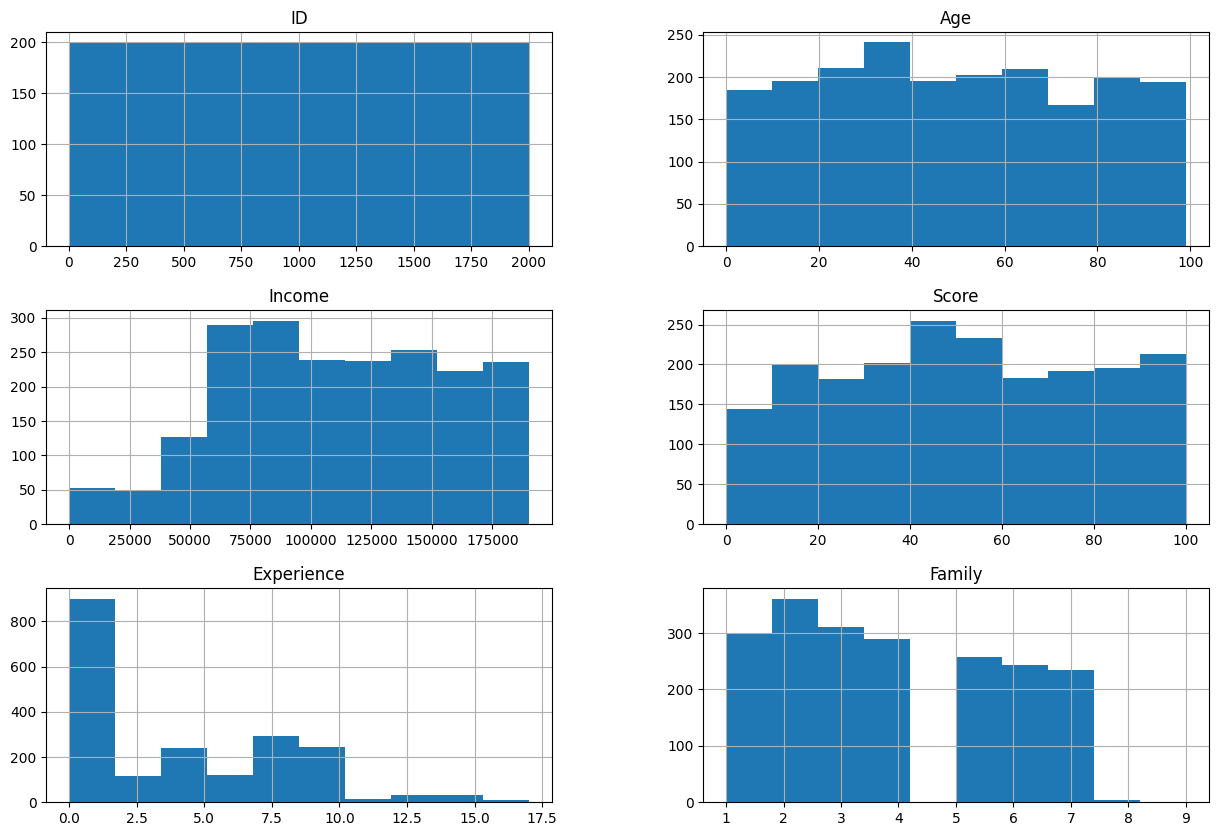

In [ ]:
# Histograma
dataset.hist(figsize = (15,10))
plt.show()

O Gráfico de Densidade, ou Density Plot, é bem parecido com o histograma, mas com uma visualização um pouco diferente. Com ele, pode ser mais fácil identificar a distribuição do atributos do dataset. Assim como fizemos com o histograma, vamos criar um density plot para cada atributo do dataset.

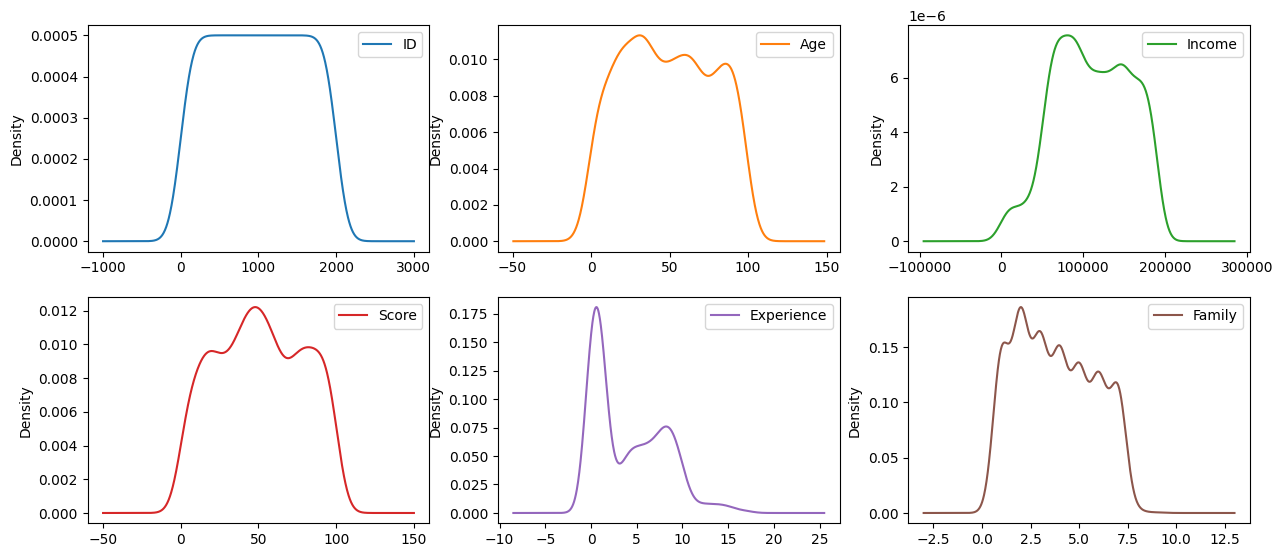

In [ ]:
# Density Ploy
dataset.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

Vamos agora trabalhar com boxplots. No boxblot, a linha no centro representa o valor da mediana (segundo quartil ou p50). A linha abaixo é o 1o quartil (p25) e a linha acima o terceiro quartil (p75). O boxplot ajuda a ter uma ideia da dispersão dos dataset e os possíveis outliers.

OBS: Se um ponto do dataset é muito distante da média (acima de 3 desvios padrão da média), pode ser considerado outlier.

Nos gráficos bloxplot, veremos que a dispersão dos atributos do dataset é bem parecida.

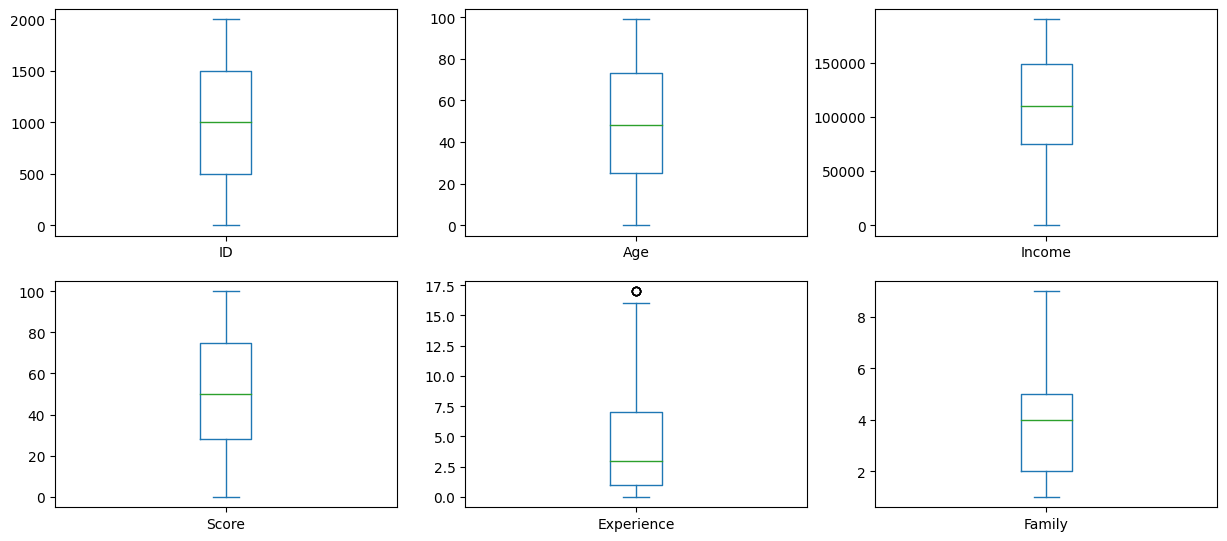

In [ ]:
# Boxplot
dataset.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

### 3.3 Visualizações Multimodais
A matriz de correlação exibe graficamente a correlação entre os atributos numéricos do dataset. O código a seguir exibe a matriz de correlação.

Ao visualizar as correlações entre os atributos através da matriz de correlação, perceberemos que a predominância é da cor vermelha, o que sugere alguma correlação negativa moderada.

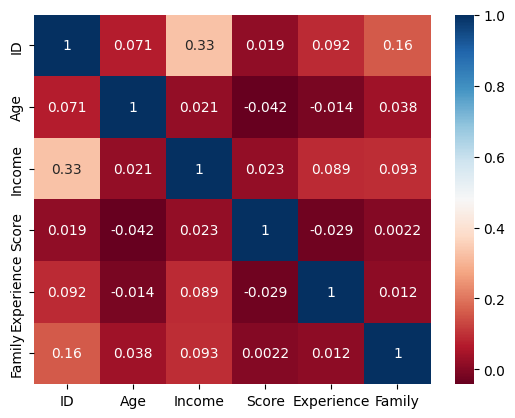

In [ ]:
# Matriz de correlação com Seaborn
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu');

Por sua vez, o gráfico de dispersão (scatter plot) mostra o relacionamento entre duas variáveis. Vamos exibir um para cada par de atributos dos dataset, usando o Seaborn.

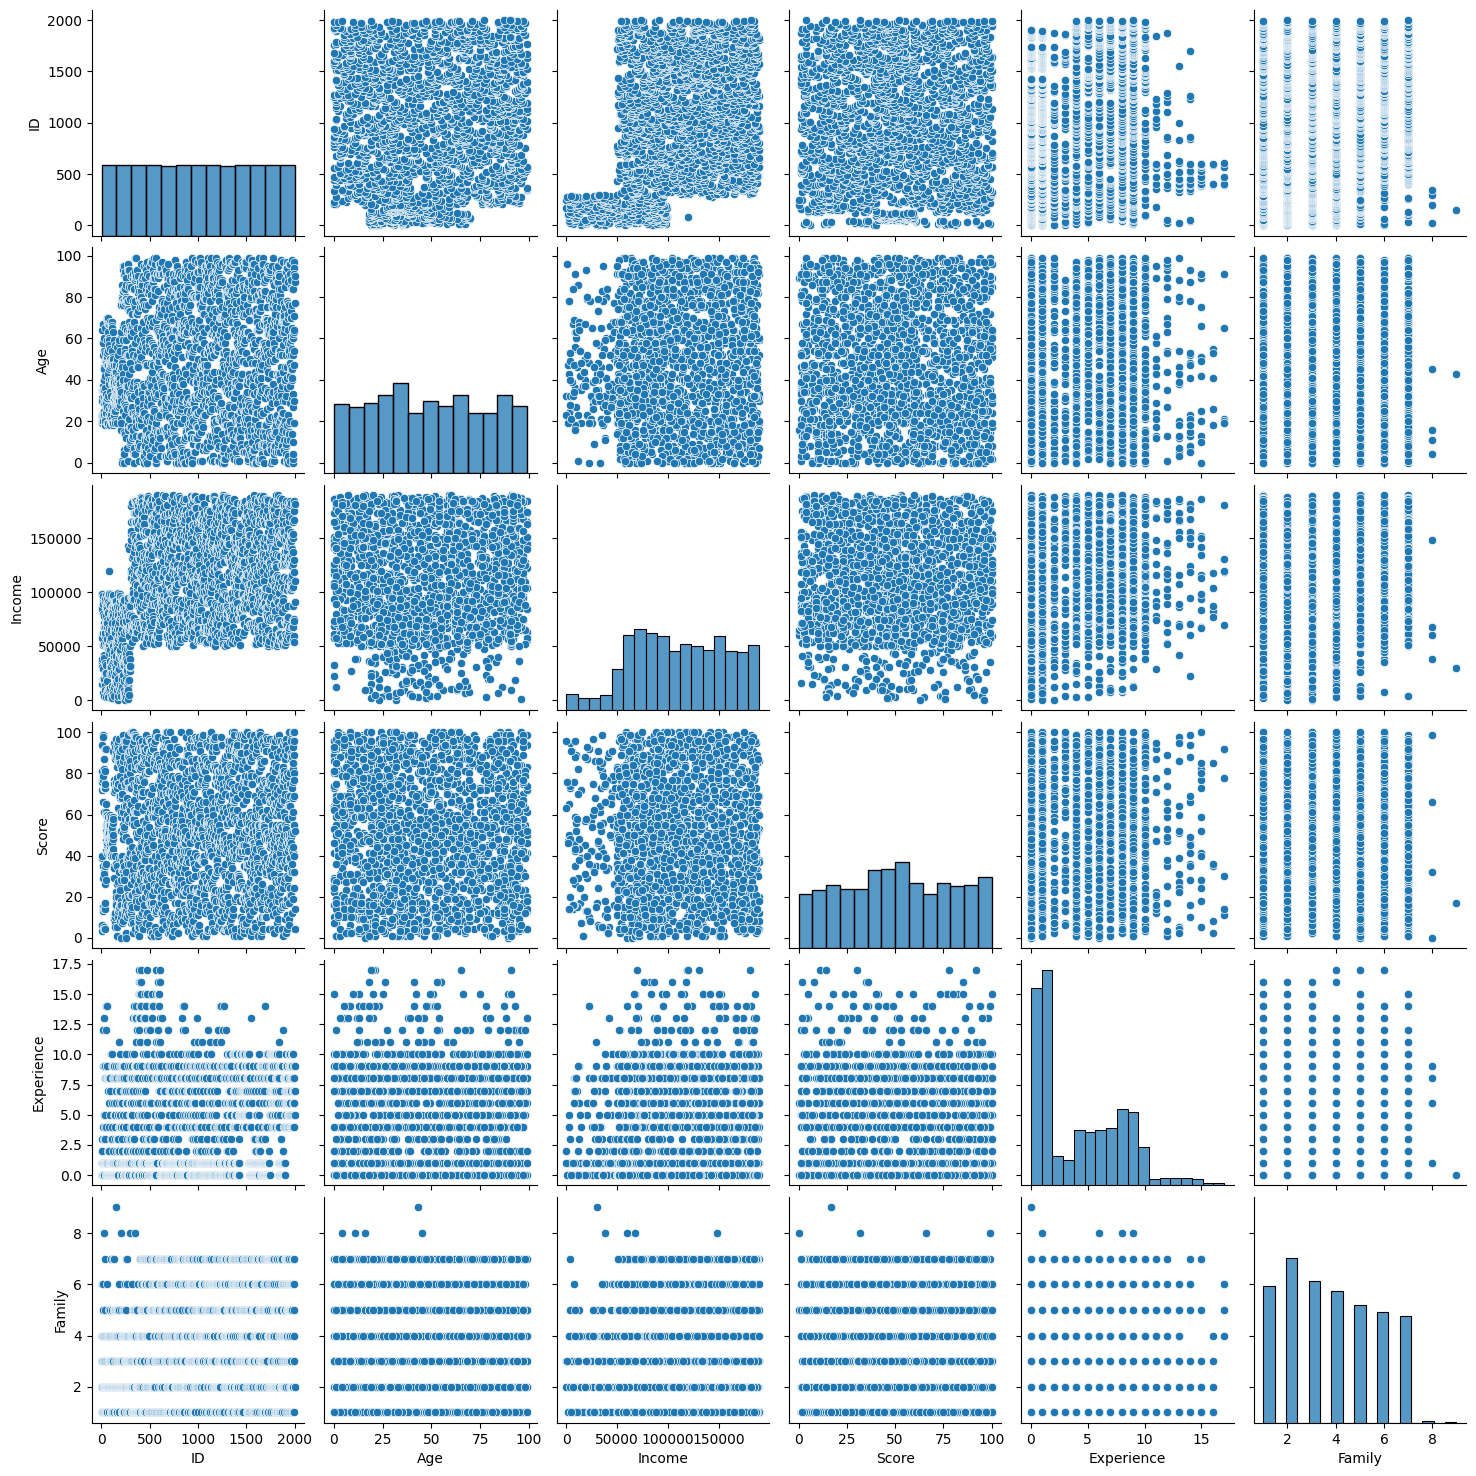

In [ ]:
# Scatter Plot com Seaborn - Variação 1
sns.pairplot(dataset);

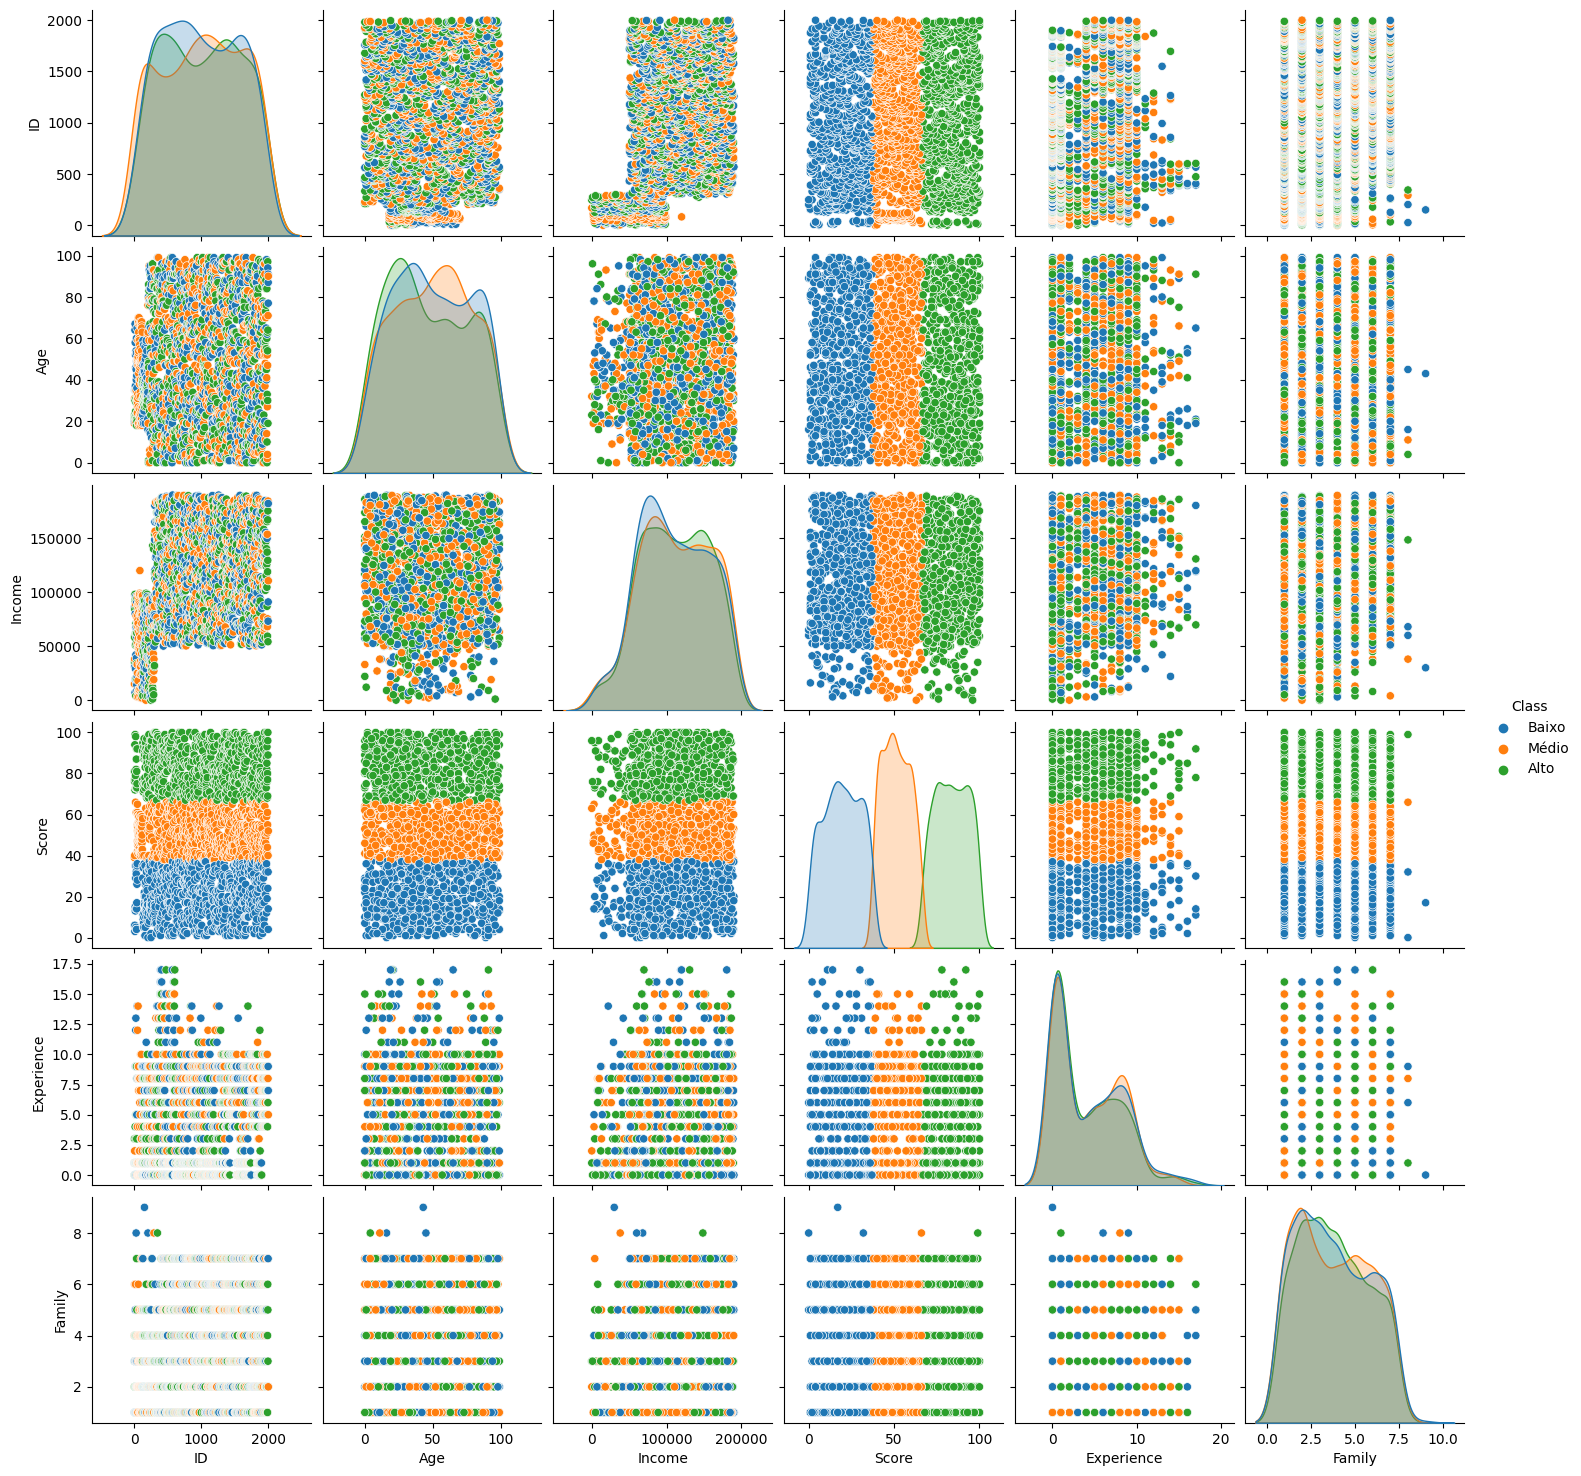

In [ ]:
# Scatter Plot com Seaborn - Variação 2
sns.pairplot(dataset, hue = "Class", height = 2.5);

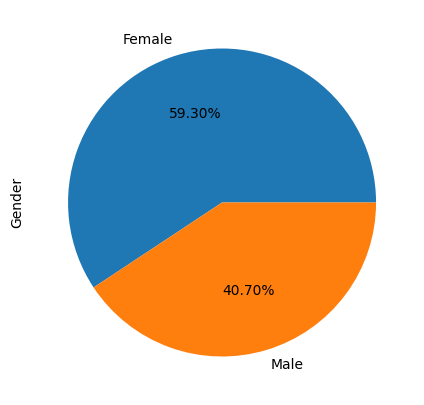

In [ ]:
# Gráfico para mostrar o gênero dos clientes
df = dataset['Gender'].value_counts()
plot = df.plot.pie(x='Gender', figsize=(5, 5), autopct='%1.2f%%')

Nesse gráfico, verificamos que não há uma diferença relevante no percentual do gênero feminino (59.30%) e masculino (40.70%), que compõe o dataset.

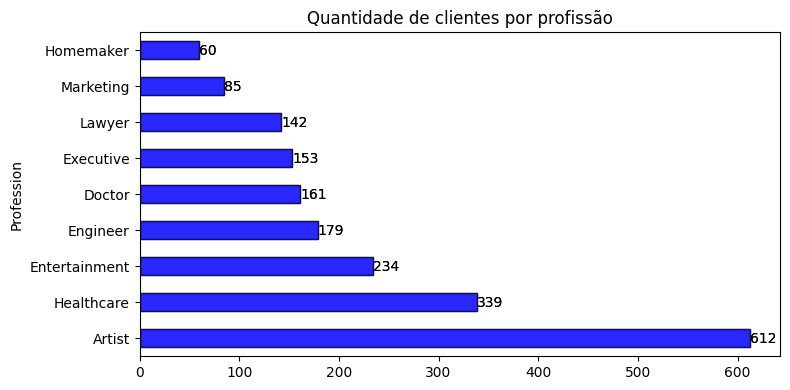

In [ ]:
# Gráfico para mostrar as profissões dos clientes
df = dataset['Profession'].value_counts()
df.plot.barh(color='blue', ec='k', alpha=0.6, figsize = (8,4))
plt.yticks(rotation = 360, fontsize=10)
plt.xticks(fontsize=10)

# Acrescenta rótulos dos eixos
plt.ylabel("Profession", fontsize=10)

# Acrescenta o título do gráfico
plt.title('Quantidade de clientes por profissão')

# Acrescenta os rótulos de dados
plot = df.plot.barh(color='blue', ec='k', alpha=0.6)
for i in plot.patches:
  plot.annotate(i.get_width(), (i.get_width(), i.get_y() + i.get_height()/4));

# Ajusta as margens do gráfico
plt.tight_layout()

# Exibe o gráfico
plt.show()

Já nesse segundo gráfico, podemos ver que a maioria dos clientes possuem as profissões de 'Artist' e 'Healthcare'.

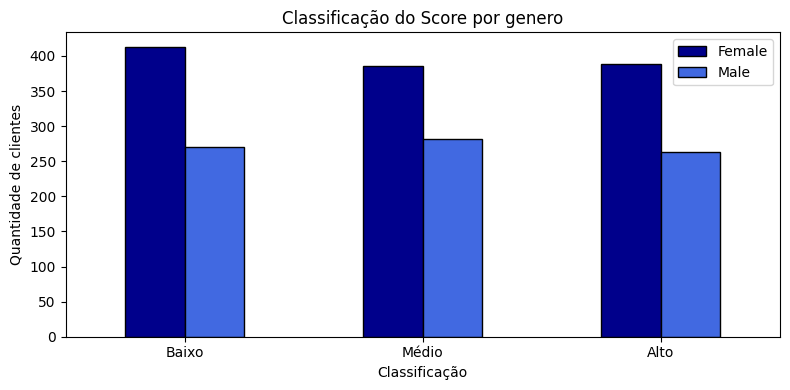

In [ ]:
# Gráfico para mostrar as relação entre o genero dos clientes e a classificação do score
score_genero = dataset['Gender'].groupby(dataset['Class']).value_counts()
score_genero.unstack().plot.bar(color=['darkblue','royalblue'], ec = 'k', figsize=(8,4))
plt.xticks(rotation = 360, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc=1)

# Acrescenta rótulos dos eixos
plt.xlabel("Classificação", fontsize=10)
plt.ylabel("Quantidade de clientes", fontsize=10)

# Acrescenta o título do gráfico
plt.title('Classificação do Score por genero')

# Ajusta as margens do gráfico
plt.tight_layout()

# Exibe o gráfico
plt.show()

Ao analisar a classificação do Score em relação ao gênero dos clientes, verificamos que as quantidades de clientes dos gêneros feminino e masculino é praticamente igual, independente do score ser baixo, médio ou alto.

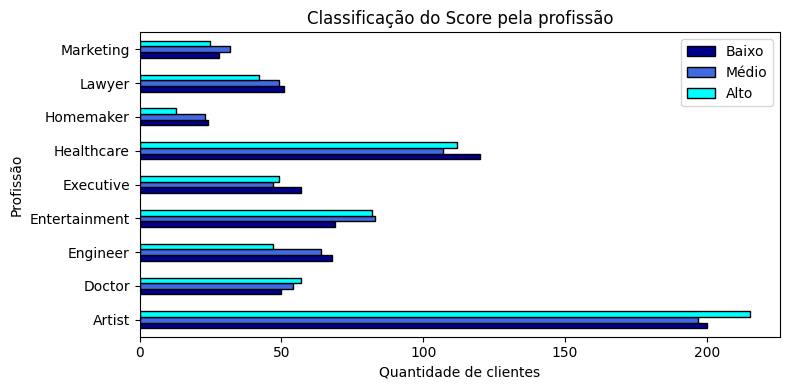

In [ ]:
# Gráfico para mostrar as relação entre a profissão dos clientes e a classificação do score
score_genero = dataset['Class'].groupby(dataset['Profession']).value_counts()
score_genero.unstack().plot.barh(color=['darkblue','royalblue','aqua'], ec = 'k', figsize=(8,4))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(loc=1)

# Acrescenta rótulos dos eixos
plt.xlabel("Quantidade de clientes", fontsize=10)
plt.ylabel("Profissão", fontsize=10)

# Acrescenta o título do gráfico
plt.title('Classificação do Score pela profissão')

# Ajusta as margens do gráfico
plt.tight_layout()

# Exibe o gráfico
plt.show()

Agora, analisando a classificação do score em relação às profissões, vemos que a Artist e Doctor são as profissões que têm mais clientes com score alto do que baixo e médio. Já as profissões Lawyer, Healthcare e Engineer são as profissões que têm mais clientes com score baixo do que médio e alto.

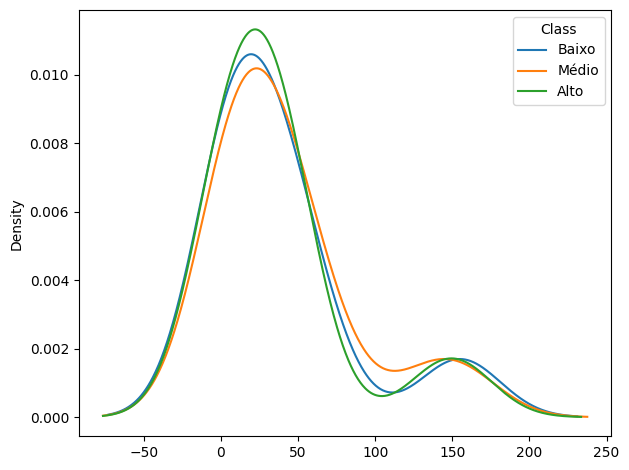

In [ ]:
# Gráfico para mostrar as relação entre a renda dos clientes e a classificação do score
dataset.groupby('Class')['Experience'].value_counts().unstack(0).plot.kde()

# Ajusta as margens do gráfico
plt.tight_layout()

# Exibe o gráfico
plt.show()

No gráfico acima, percebemos que os níveis da classificação do score tem a mesma distribuição em relação aos anos de experiência do cliente. 

## 4. Pré-Processamento de Dados
Nesta etapa, vamos realizar algumas operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados.

### 4.1 Tratamento de Missings e Limpeza
Pecebemos que no dataset há missings aparentes, mas também há valores "0" que podem significar falta de dados de entrada.

In [ ]:
# verificando nulls no dataset
dataset.isnull().sum()

ID             0
Gender         0
Age            0
Income         0
Score          0
Profession    35
Experience     0
Family         0
Class          0
dtype: int64

<Axes: >

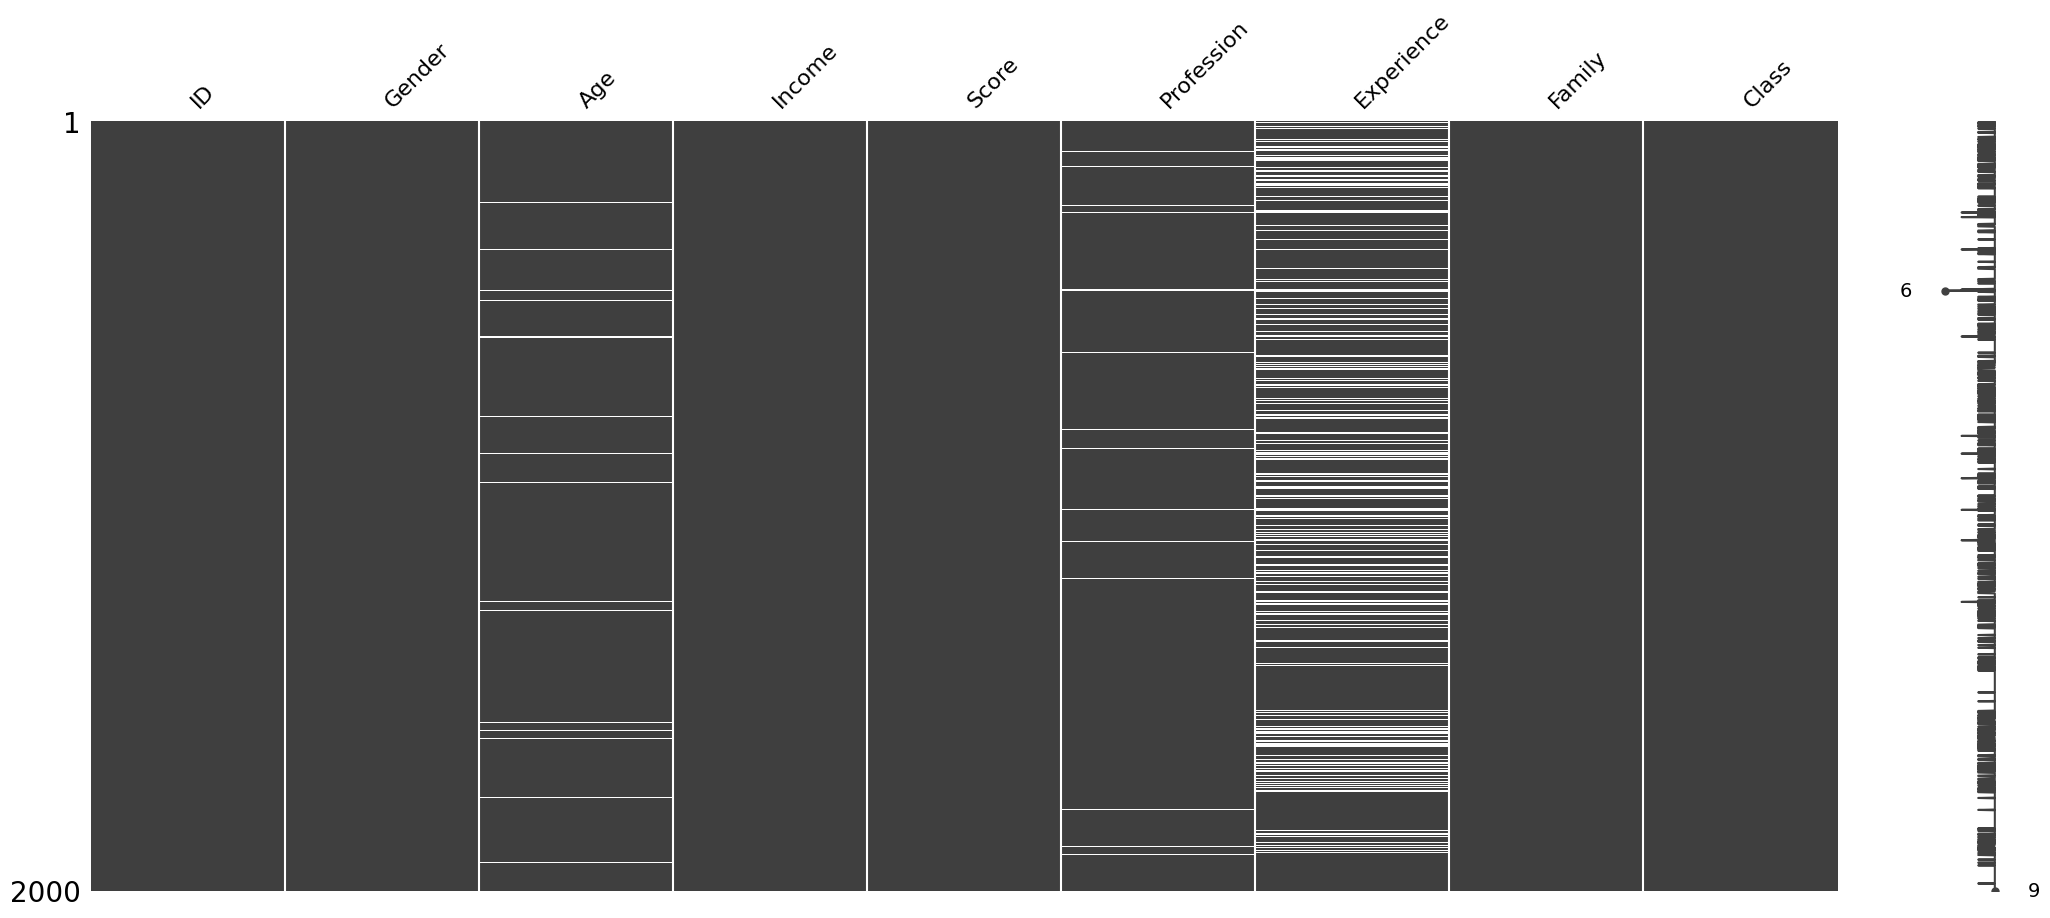

In [ ]:
# salvando um NOVO dataset para tratamento de missings

# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas do dataset original
datasetSemMissings = dataset[col[:]]

# substituindo os zeros por NaN
datasetSemMissings.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(datasetSemMissings)

In [ ]:
# verificando novamente nulls no dataset
datasetSemMissings.isnull().sum()

ID              0
Gender          0
Age            24
Income          2
Score           2
Profession     35
Experience    431
Family          0
Class           0
dtype: int64

A coluna 'Experience' há uma quantidade relevante de valores faltantes em relação ao número total de registros. Vamos, então, excluir essa coluna.

<Axes: >

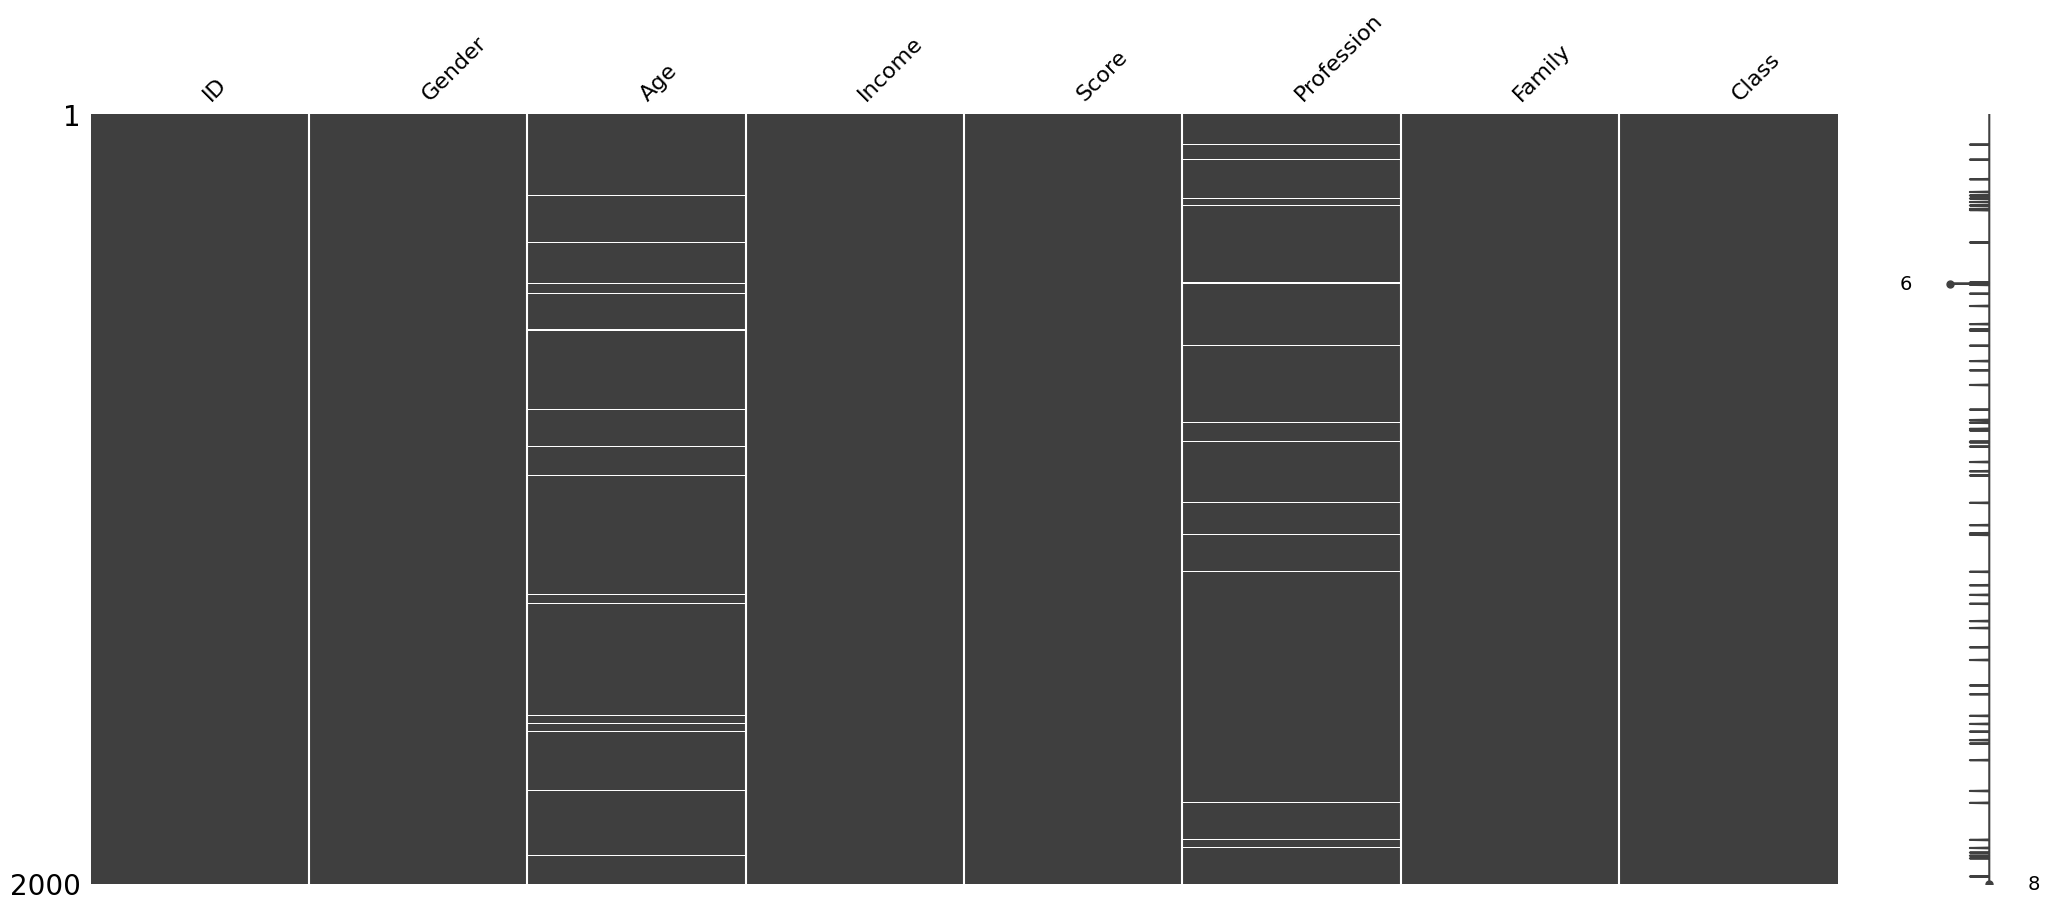

In [ ]:
# removendo a coluna 'Experience'
datasetSemMissings.drop(['Experience'], axis=1, inplace= True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(datasetSemMissings)

Vamos substituir os valores faltantes por 0 em 'Income', pois pode haver clientes que não possuem renda. Já nas colunas 'Age' e 'Score', vamos incluir a mediana da coluna nos valores faltantes.

<Axes: >

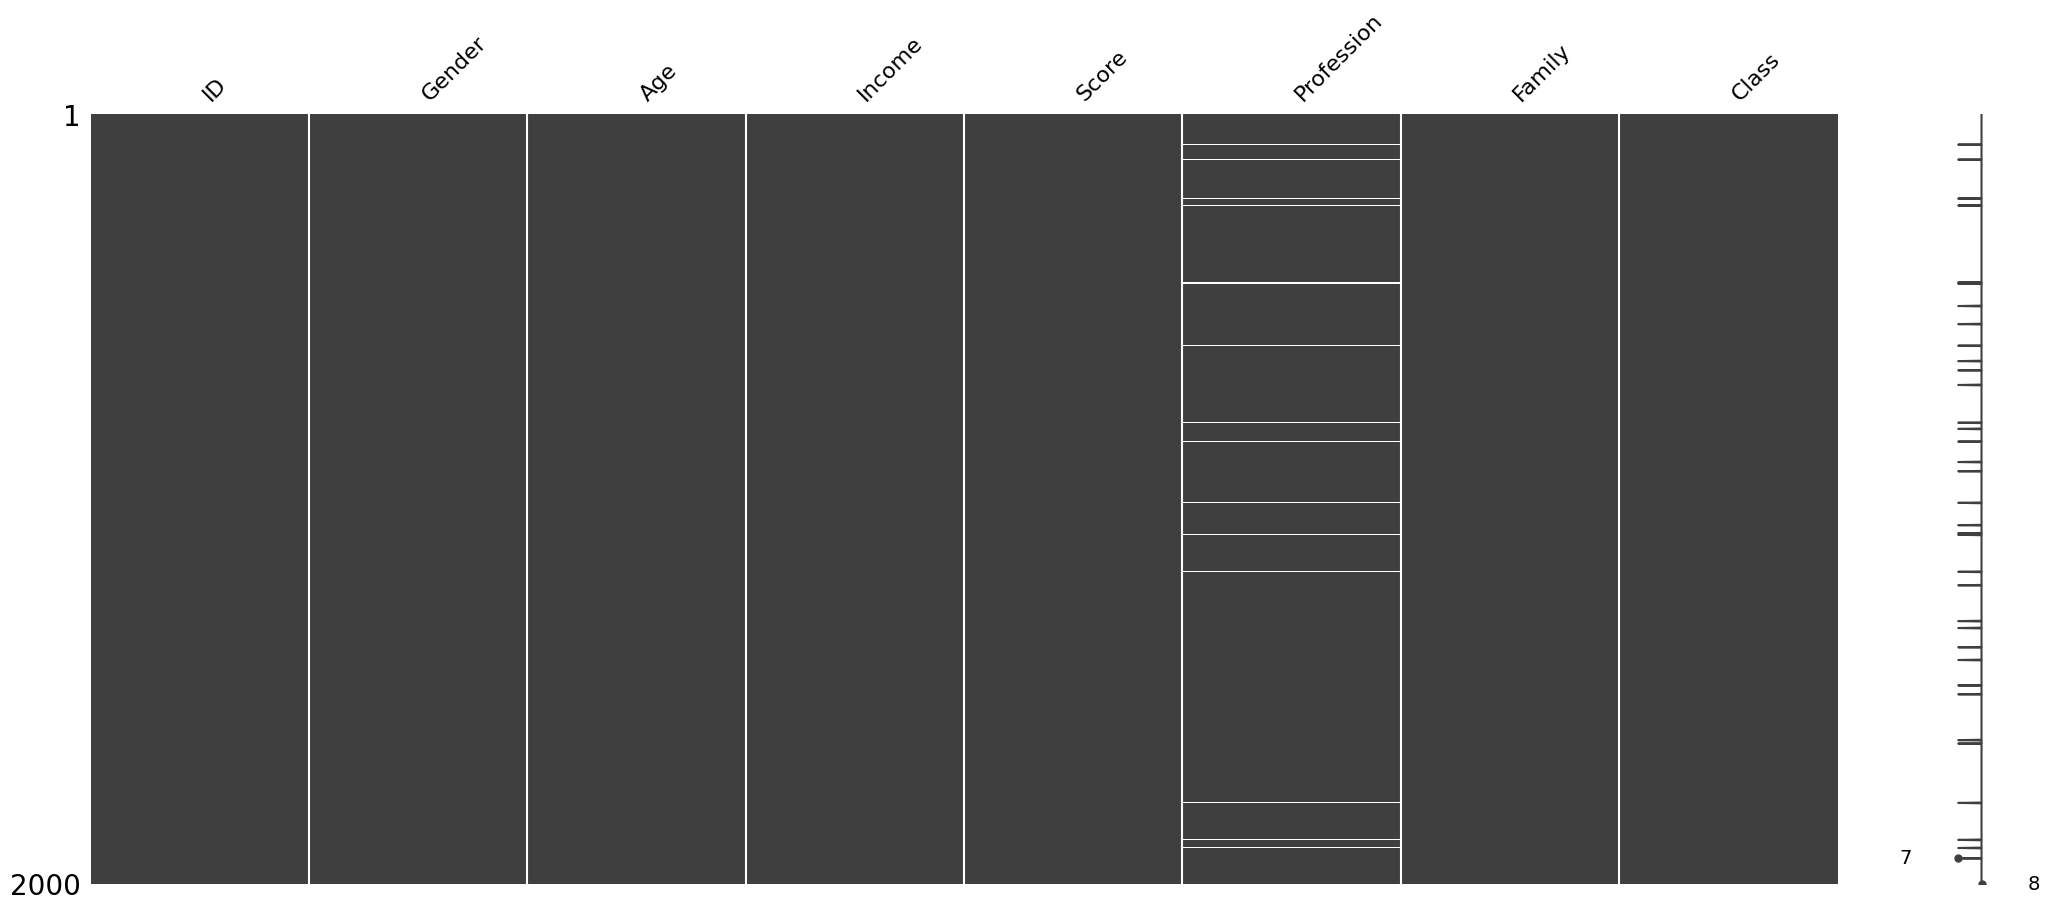

In [ ]:
# substituindo os NaN de 'inc' por 0 - voltando aos valores originais desta coluna
datasetSemMissings['Income'].fillna(0, inplace=True)

# substituindo os NaN de 'age' pela mediana da coluna
datasetSemMissings['Age'].fillna(datasetSemMissings['Age'].median(), inplace=True)
datasetSemMissings['Score'].fillna(datasetSemMissings['Score'].median(), inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(datasetSemMissings)

Como na coluna 'Profession' ainda há missings, vamos excluir as linhas que possuem algum valor faltante nessa coluna.

<Axes: >

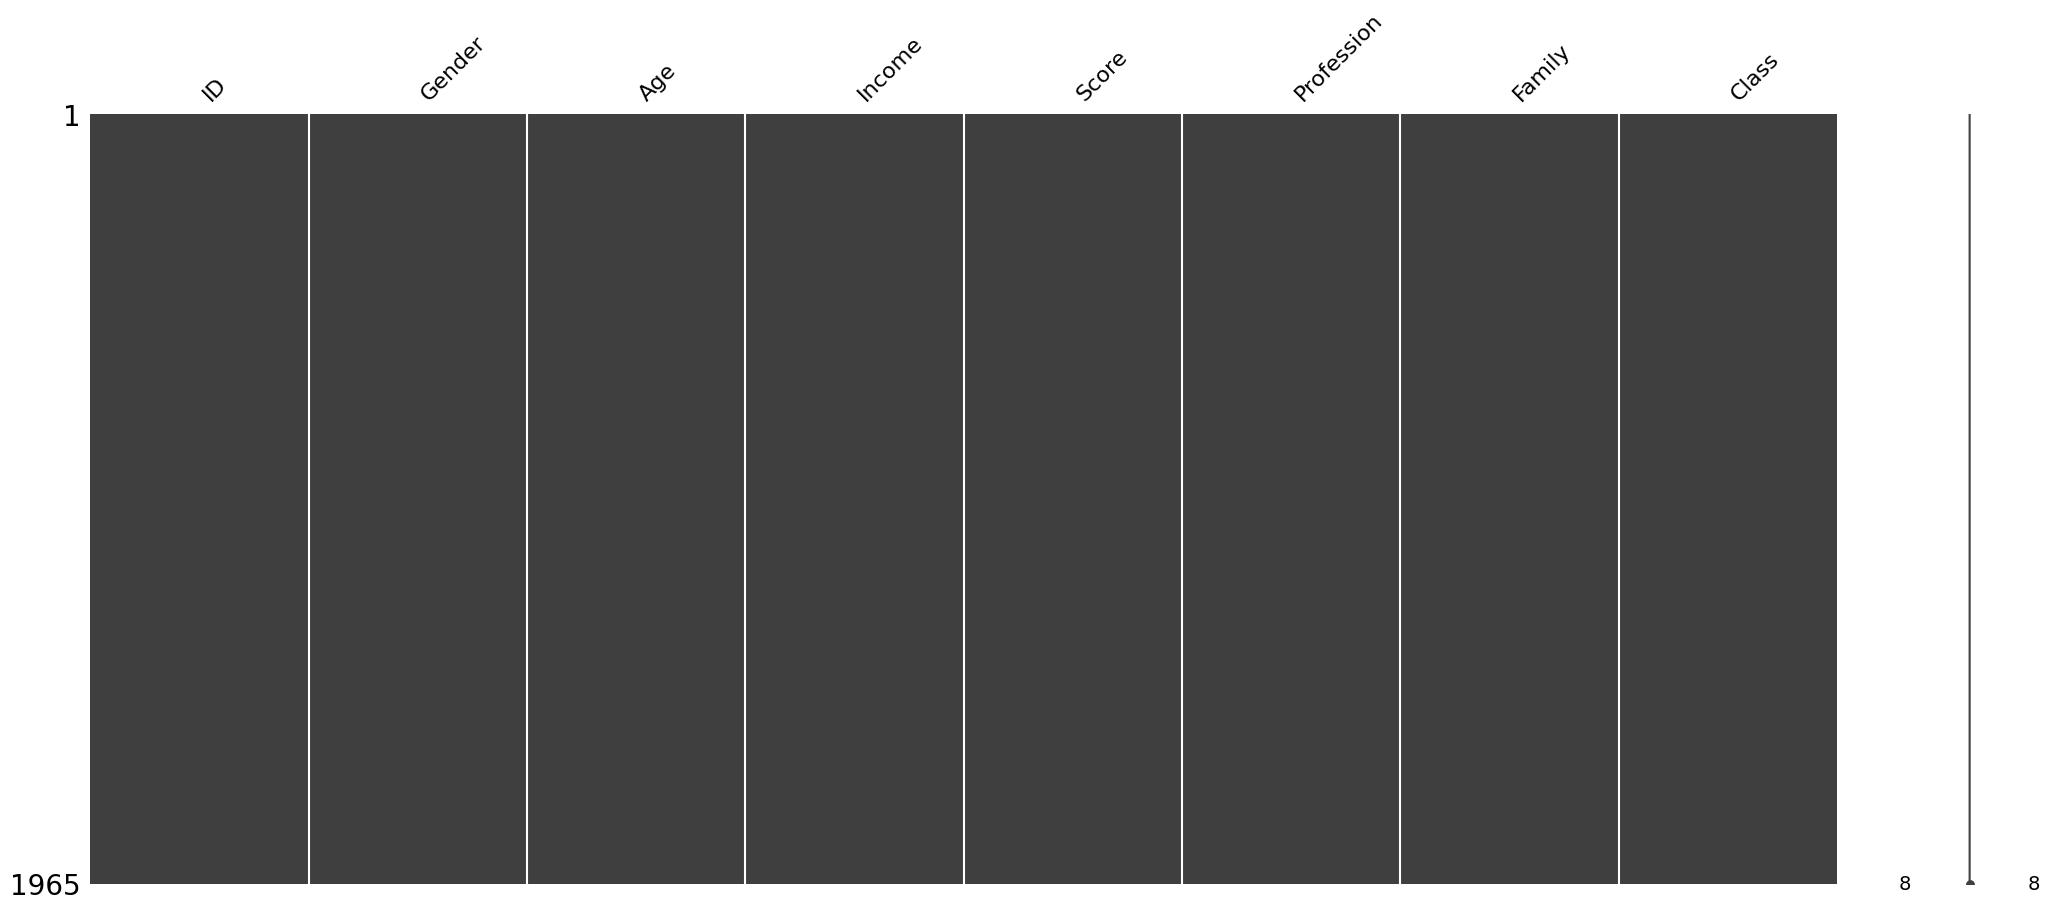

In [ ]:
# eliminando linhas que tenham algum valor missing da coluna 'Profession'
datasetSemMissings.dropna(how='any', inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(datasetSemMissings)

In [ ]:
# Mostra as informações do dataset tratado
datasetSemMissings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          1965 non-null   int64   
 1   Gender      1965 non-null   object  
 2   Age         1965 non-null   float64 
 3   Income      1965 non-null   float64 
 4   Score       1965 non-null   float64 
 5   Profession  1965 non-null   object  
 6   Family      1965 non-null   int64   
 7   Class       1965 non-null   category
dtypes: category(1), float64(3), int64(2), object(2)
memory usage: 124.9+ KB


In [ ]:
# exibindo as primeiras linhas
datasetSemMissings.head()

ID  Gender   Age   Income  Score     Profession  Family  Class
0   1    Male  19.0  15000.0   39.0     Healthcare       4  Médio
1   2    Male  21.0  35000.0   81.0       Engineer       3   Alto
2   3  Female  20.0  86000.0    6.0       Engineer       1  Baixo
3   4  Female  23.0  59000.0   77.0         Lawyer       2   Alto
4   5  Female  31.0  38000.0   40.0  Entertainment       6  Médio

In [ ]:
# verificando nulls no dataset tratado
datasetSemMissings.isnull().sum()

ID            0
Gender        0
Age           0
Income        0
Score         0
Profession    0
Family        0
Class         0
dtype: int64

### 4.2 Separação em conjunto de treino e conjunto de teste
É uma boa prática usar um conjunto de teste (na literatura também chamado de conjunto de validação), uma amostra dos dados que não será usada para a construção do modelo, mas somente no fim do projeto para confirmar a precisão do modelo final. É um teste que podemos usar para verificar o quão boa foi a construção do modelo, e para nos dar uma ideia de como o modelo irá performar nas estimativas em dados não vistos. Usaremos 80% do conjunto de dados para modelagem e guardaremos 20% para teste, usando a estratégia train-test-split, já explicada anteriormente. Primeiramente, iremos sinalizar quais são as colunas de atributos (X - 0 a 7) e qual é a coluna das classes (Y - 8). Em seguida, especificaremos o tamanho do conjunto de teste desejado e uma semente (para garantir a reprodutibilidade dos resultados). Finalmente, faremos a separação dos conjuntos de treino e teste através do comando train_test_split, que retornará 4 estruturas de dados: os atributos e classes para o conjunto de teste e os atributos e classes para o conjunto de treino.

In [ ]:
# separando o array em componentes de input e output (dataset original)
X = dataset.values[:,0:8]
y = dataset.values[:,8]

# separando o array em componentes de input e output (dataset sem missings - 1 coluna a menos!)
X = dataset.values[:,0:7]
y = dataset.values[:,7]

In [ ]:
test_size = 0.20
seed = 7

# Separação em conjuntos de treino e teste (dataset original)
array = dataset.values
X = array[:,0:8]
y = array[:,8]

#X_train, X_test, y_train, y_test = train_test_split(X, y,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # com estratificação
     

In [ ]:
# Separação em conjuntos de treino e teste (dataset sem missings - 1 coluna a menos!)
array = datasetSemMissings.values
X_sm = array[:,0:7]
y_sm = array[:,7]
#X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,
#    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y_sm) # com estratificação
     